Defaulting to user installation because normal site-packages is not writeable
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  Target
0  -1.322458   1.748113  -1.351074  -1.445921   1.792659  -2.741316       0
1   0.054934   0.695617  -1.245717   0.073310   0.550877  -1.326263       1
2   1.857702  -0.839524   1.497432   1.324024  -1.018612   1.087993       1
3  -1.751829  -0.215598  -1.154363   2.777598  -0.872098  -0.605270       0
4  -0.009300   0.220160   0.000207  -0.677684   0.349892  -0.165382       0
         Feature_1    Feature_2    Feature_3    Feature_4    Feature_5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.000416     0.021475    -0.012107    -0.048433     0.029704   
std       1.003111     0.818102     1.009586     1.322137     0.858969   
min      -2.991136    -2.787107    -3.019512    -3.836929    -3.281236   
25%      -0.710385    -0.517717    -0.695964    -1.021008    -0.456377   
50%       0.000185    

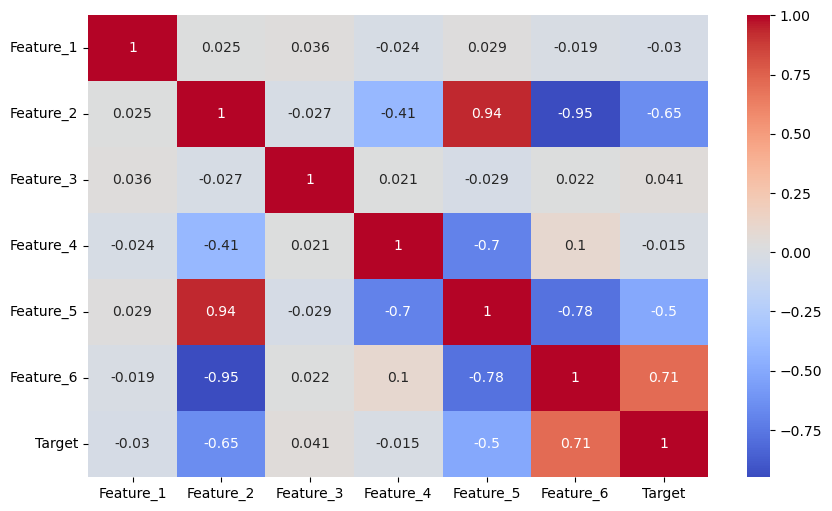

KeyError: "['target'] not found in axis"

In [3]:

!pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
df = pd.read_csv(r"C:\Users\madha\Downloads\Day 53 Bagging and Random Forests.csv")
print(df.head())
print(df.describe())
print(df.isnull().sum())
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])
X = df.drop(columns=['target'])  # Assuming 'target' is the label column
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Model (Decision Tree)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

# Bagging Classifier
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, bagging_pred))

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Feature Importance:", rf.feature_importances_)

# AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_pred))

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))

# XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))

# Model Comparison
models = ['Decision Tree', 'Bagging', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost']
accuracies = [
    accuracy_score(y_test, dt_pred),
    accuracy_score(y_test, bagging_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, ada_pred),
    accuracy_score(y_test, gb_pred),
    accuracy_score(y_test, xgb_pred)
]
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.show()

# Evaluation Metrics
for name, pred in zip(models, [dt_pred, bagging_pred, rf_pred, ada_pred, gb_pred, xgb_pred]):
    print(f"{name} Classification Report:\n", classification_report(y_test, pred))
    print(f"{name} ROC-AUC Score:", roc_auc_score(y_test, pred))
print(df.columns)
